<table bgcolor=#ffffff align="center" width="100%" noborder>
    <tr>
        <td align="left" width="30%"><img src="images/IST_logo.png" width="50%"></td>
        <td width="40%"></td>
        <td align="right" width="30%"><a href="DSlabs.ipynb"><img src="images/ds_logo.png" width="25%"></a></td>
    </tr>
</table>
<h1 align="center" style="font-family:Arial;color:#00004d;font-size:40px;">Data Science Labs</h1>

<h2 align="center" style="font-family:Arial;color:#6c6c6c;font-size:30px;">Python basics for data science (cont.)</h2>

<h3 style="font-family:Arial;color:#6c6c6c;font-size:25px;">Basic charts with <code>matplotlib.pyplot</code></h3>

<code>matplotlib.pyplot</code> is one of the best-known Python packages for plotting 2D charts. In order to plot this 
kind of element, the package works around the classes <code>Figure, Subplot</code> and <code>Axes</code>. Usually, it 
is imported as <code>plt</code>.

The <code>Figure</code> corresponds to the canvas where the elements would be plotted. It can be created through the 
<code>figure</code> method, and we can specify its number and size through the optional parameters <code>num</code> and 
<code>fig_size</code>. 

If these parameters are not given, the default values will be assumed: 
- the figure will have 6.4 inches (16.256 cm) of width and 4.8 inches (12.192 cm) of height
- the figure number will be the increment of the number of figures created so far, starting on 1. 

The last figure created become the active one, and any command will be applied to it, unless we call the method directly
from a previous created figure.

The <code>gcf</code> method returns a reference to the current active figure.

In [20]:
import matplotlib.pyplot as plt

fig = plt.figure(num=1, figsize=(5,4))

<Figure size 360x288 with 0 Axes>

Plotting some data in the figure, is done just through the <code>plot</code> method, providing the data to plot. 
After ploting the data, we just need to invoke the <code>show</code> method. 

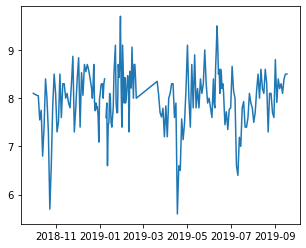

In [21]:
import pandas as pd
data = pd.read_csv('data/algae.csv', index_col='date', parse_dates=True, infer_datetime_format=True)
fig = plt.figure(figsize=(5,4))
plt.plot(data['pH'])
plt.show()

In our case, we plot the pH data recorded along time in the algae dataset. As we can see, the figure shows the pH values,
between 5 and 10, recorded from 2018-09-30 to 2019-09-17. By default, the data index ('date' in our example) is used
as labels in the abscissas axis, and the 'pH' values in the ordinates axis.

In order to change the ordinates axis, we can change its limits in the plot, by invoking <code>xlim</code> and 
<code>ylim</code> methods, given them the left and right for their intervals. It is also possible to add a title to the 
plot and titles to the axes, as below.

To make it more reusable, we define our first function

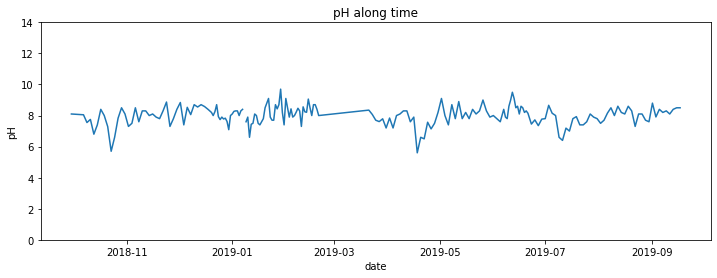

In [22]:
    
fig = plt.figure(figsize=(12,4))
plt.ylim(0, 14)
plt.title('pH along time')
plt.xlabel('date')
plt.ylabel('pH')
plt.plot(data['pH'])
plt.show()

Naturally, we can want to plot more than one chart in a figure, in order to do that we can split the figure with the
<code>subplots</code> method.

This method receives the number of rows and columns to split the figure, and additional parameters to specify which 
subplots will share the abscissas and ordinates, <code>sharex</code> and <code>sharey</code> optional parameters, 
respectively.

<code>subplots</code> returns the slitted figure and a bi-dimensional array of <code>Axes</code>, one for each new part
of the figure. An <code>Axes</code> is the class that encompasses the majority of elements in figures, such as the title,
the legend, but also the usual ones in charts, like the coordinate system, its labels, units, ticks, etc.

In this manner, to be able to plot different parts in a single figure, we have to invoke the methods to change the 
previous methods, through the axes object, as below.
 
To make it more reusable, we define our first function for plotting a line chart, and another to choose the best number
of subplots to show all the variables in a dataset (<code>choose_grid</code>, which shows 5 subplots per row, at most).

<Figure size 1440x1080 with 0 Axes>

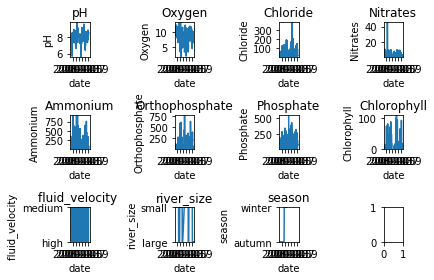

In [23]:
def line_chart(ax, series, title, xlabel, ylabel, ymin, ymax):
    ax.set_ylim(ymin, ymax)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.plot(series)

def choose_grid(nr):
    return nr // 5 + 1, 5

(rows, cols) = (3, 4) #choose_grid(data.shape[1])
plt.figure(figsize=(cols*5, rows*5))
fig, axs = plt.subplots(rows, cols)
i, j, n = 0, 0, 0

for col in data:
    line_chart(axs[i, j], data[col], col, 'date', col, ymin=data[col].min(), ymax=data[col].max())
    n = n + 1
    i, j = (i + 1, 0) if n % cols == 0 else (i, j + 1)
plt.tight_layout()
plt.show()

A similar approach is used to plot several series in a single chart. Our function <code>multiple_line_chart</code> 
exemplifies it. Note that the series have to have the same index, and should have similar ranges for their values.

All the series in a dataframe satisfy the first constraint, and Phosphate and Orthophosphate satisfy the second too.

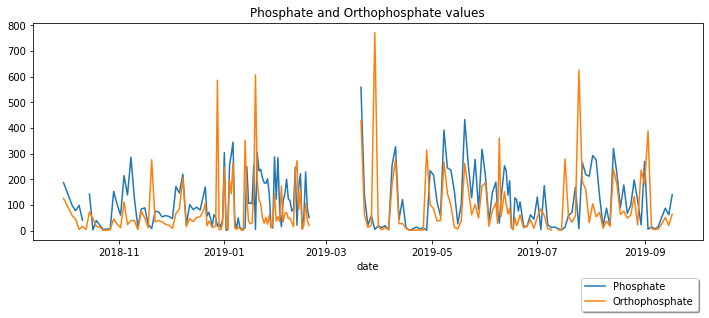

In [26]:
def multiple_line_chart(ax, title: str, x_name: str, y_name: str, x_values: list, y_values: dict):
    legend: list = []
    ax.set_xlabel(x_name)
    ax.set_ylabel(y_name)
    ax.set_title(title)
    for name, y in y_values.items():
        ax.plot(x_values, y)
        legend.append(name)
    ax.legend(legend, loc='best', bbox_to_anchor=(1, -0.15),fancybox = True, shadow = True)    

plt.figure(figsize=(12,4))
two_series = {'Phosphate': data['Phosphate'], 'Orthophosphate': data['Orthophosphate']}
multiple_line_chart(plt.gca(), 'Phosphate and Orthophosphate values', 'date', '', data.index, two_series)
plt.show()

Note the use <code>gca</code> that returns the current axes, which is passed as a parameter to our function.

<code></code>

In [ ]:
import numpy as np

def bar_chart(series, labels, title):
    plt.title(title)
    plt.ylabel("number of ")
    x = np.arange(len(series))
    plt.xticks(x, labels, rotation='vertical')
    plt.bar(x, series, edgecolor='grey')
    


<h3 style="font-family:Arial;color:#6c6c6c;font-size:25px;">More charts with <code>seaborn</code></h3>

<table bgcolor=#ffffff align="center" width="100%" noborder>
    <tr>
        <td align="center" width="30%"><a href="Lab0.ipynb"><img src="images/prev.png"></a></td>
        <td width="40%"></td>
        <td align="center" width="30%"><a href="Lab03.ipynb"><img src="images/next.png"></a></td>
    </tr>
</table>
